In [1]:
import torch

In [2]:
import scipy.io as sio
from scipy.interpolate import interp1d
from scipy import interpolate
import scipy
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from matplotlib.widgets import TextBox
import matplotlib.cm as cm
import matplotlib.image as mpimg 
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib.colors
from matplotlib.pyplot import show 


# Retrieve pickle and csv data

In [3]:
## pickle ##
import pickle

file = open('/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/robin_data_tensor_dump.pkl', 'rb')
filtered_data_to_tensor = pickle.load(file)
amplitude_filtereddata_to_tensor  = pickle.load(file)
peak2peak_data_to_tensor = pickle.load(file)

file.close()



In [4]:
# to retrieve ##
mt_electrodes = pd.read_csv('/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/mt_electrodes.csv')
mt_muscles= pd.read_csv("/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/mt_muscles.csv")
unique_amplitudes=pd.read_csv("/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/unique_amplitudes.csv")

# Save figure

In [48]:
def save_figure(folder_name, data_file):
    """
    A function to get the number for the heatmap by by taking the  electric current at the point where afferent recruitment reaches 100%.
    
    Parameters
    ----------
    folder_name
        which folder should it be saved to? eg. recruitment/roots
    data_file
        name of plot
    """
    data_folder = f"/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/plots/"
    save_folder = os.path.join(data_folder,folder_name)
    os.makedirs(save_folder,exist_ok=True)
    data_file_path = os.path.join(save_folder,data_file)
    plt.savefig(data_file_path, transparent = "False",  
    facecolor='w',
    bbox_inches='tight'
    )

# Filtered EMG

Plot the raw values,thus for every electrode-muscle combination you have a curve for every amplitude for that combination


In [ ]:
def get_raw_emg_per_electrode(filtered_data_to_tensor=filtered_data_to_tensor,amplitude_filtereddata_to_tensor=amplitude_filtereddata_to_tensor,  save_fig=0, mt_electrodes=mt_electrodes):
    """
    A function to create recruitment curves by electrode

    Parameters
    ----------
    filtered_data_to_tensor
        EMG data used for the recruitment curve, set by default
    amplitude_filtereddata_to_tensor
        Amplitudes used for the recruitment curve, set by default

    save_fig
        int, if set to 1 save figure
    mt_electrodes
        pandas df, all ellectrodes used in data
    mt_muscles
        pandas df, all muscles used in data


    """



    for elec_i in range (0, len(mt_electrodes[0:1])):
        fig, ax = plt.subplots(figsize=(10,7))
        for muscle_i in range (len(mt_muscles[0:1])):
            for amplitude_i in range (0, len(amplitude_filtereddata_to_tensor[elec_i, muscle_i, :])):
                colors = cm.rainbow(np.linspace(0, 1, len(amplitude_filtereddata_to_tensor[elec_i, muscle_i, :])))
                # if no values for that amplitude break for loop
                if np.isnan(np.array(amplitude_filtereddata_to_tensor[elec_i, muscle_i, amplitude_i])):
                    continue
                # Define variables for plotting
                x = np.arange(0, len(filtered_data_to_tensor[elec_i, muscle_i, amplitude_i, 0, :]))
                y = filtered_data_to_tensor[elec_i, muscle_i, amplitude_i, 0, :]
        
    
                # Plot the data points
                plt.plot(x,  y, '-', c=colors[amplitude_i], label= unique_amplitudes["amplitudes"][amplitude_i]) 
                
            
 
            plt.legend(title="Amplitude of current [mA]")
            # Set label and scale
            ax.set_xlabel("Timepoints [in 100 ms]") # freq. rate = 10kHz, 1000 time points
            # ax.set_xticks(ticks=np.linspace(start=0.2, stop=np.max(unique_amplitudes["amplitudes"])+0.1, endpoint=True, num=25))
            ax.set_ylabel(f"filtered EMG [mV]")
            # ax.set_xticks(ticks=np.linspace(0, 100))

            # Plotting settings
            # ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
            ax.set_title(f"Filtered EMG for elec: {elec_i} and muscle: {mt_muscles['muscle_name'][muscle_i]} ")
            

        ## save plots ##
        if save_fig:
            folder_name="Raw_EMG"
            data_file="elec"+"_"+str(elec_i)+"_"+"raw_emg"+'.png'
            save_figure(folder_name, data_file)

            plt.show()
    
       


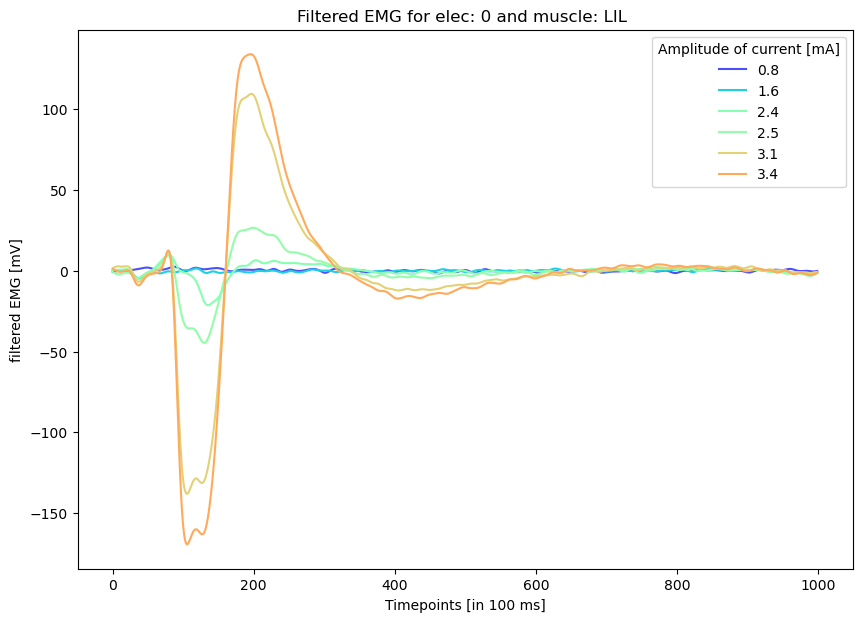

In [30]:
get_raw_emg_per_electrode(save_fig=1)


# EMG Processing -Recruitment curves

For the rectuitment curve per electrode, you have one value ( the peak to peak value) per amplitude for the different muscles.

### Recruitment per elec

In [57]:
def get_recruitment_curve_per_electrode(peak2peak_data_to_tensor=peak2peak_data_to_tensor,amplitude_filtereddata_to_tensor=amplitude_filtereddata_to_tensor,  save_fig=0, mt_electrodes=mt_electrodes):
    """
    A function to create recruitment curves by electrode

    Parameters
    ----------
    peak2peak_data_to_tensor
        Peak to peak values of EMG data, used for the recruitment curve, set by default
    amplitude_filtereddata_to_tensor
        Amplitudes used for the recruitment curve, set by default

    save_fig
        int, if set to 1 save figure
    mt_electrodes
        pandas df, all ellectrodes used in data
    mt_muscles
        pandas df, all muscles used in data


    """

    colors = cm.rainbow(np.linspace(0, 1, len(mt_muscles)))
    label=mt_muscles["muscle_name"]

    for elec_i in range (0, len(mt_electrodes)):
        fig, ax = plt.subplots(figsize=(10,7))
        for muscle_i in range (len(mt_muscles)):

            # Define variables for plotting
            x = amplitude_filtereddata_to_tensor[elec_i,muscle_i,:]
            y = peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0]
        
            
            # Remove nan values
            x_without_nan=np.array(x)
            x_without_nan=x_without_nan[~np.isnan(x_without_nan)]
            y_without_nan=np.array(y)
            y_without_nan=y_without_nan[~np.isnan(y_without_nan)]

            # Plot the data points
            plt.plot(x_without_nan,  y_without_nan, 'o-', c=colors[muscle_i], label= mt_muscles['muscle_name'][muscle_i]) 
            
            # Add text descripiton to the points for visibility
            for index in range (len(x_without_nan)):
                ax.text(x_without_nan[index], y_without_nan[index], label[muscle_i], size=10) 
            
            
            # Set label and scale
            ax.set_xlabel("Amplitude [mA]")
            ax.set_xticks(ticks=np.linspace(start=0.2, stop=np.max(unique_amplitudes["amplitudes"])+0.1, endpoint=True, num=25))
            ax.set_ylabel(f"Peak to peak value [mV]")
            ax.set_yticks(ticks=np.linspace(0, np.nanmax(peak2peak_data_to_tensor [:, :,:, 0, 0]), 11))

        # Plotting settings
        ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title="muscles")
        ax.set_title(f"Recruitment curve for elec: {elec_i}")



        ## save plots ##
        if save_fig:
            data_file = "elec"+"_"+str(elec_i)+"_"+"recruitment_curve"+'.png'
            folder_name="recruitment_curve/muscles/recruitment_per_elec"
            save_figure(folder_name, data_file)

        plt.show()


In [ ]:
get_recruitment_curve_per_electrode( save_fig=1)

### Recruitment per muscle 

In [62]:

def get_recruitment_curve_per_muscles(peak2peak_data_to_tensor=peak2peak_data_to_tensor,amplitude_filtereddata_to_tensor=amplitude_filtereddata_to_tensor,  save_fig=0, mt_electrodes=mt_electrodes):
    """
    A function to create recruitment curves by muscle. 

    Parameters
    ----------
    peak2peak_data_to_tensor
        EMG data used for the recruitment curve, set by default
    amplitude_filtereddata_to_tensor
        Amplitudes used for the recruitment curve, set by default

    save_fig
        int, if set to 1 save figure
    mt_electrodes
        pandas df, all ellectrodes used in data
    mt_muscles
        pandas df, all muscles used in data


    """

    colors = cm.rainbow(np.linspace(0, 1, len(mt_electrodes)))
    label=mt_electrodes["elec_name"]

    for muscle_i in range (len(mt_muscles)):
        fig, ax = plt.subplots(figsize=(10,7))
        for elec_i in range (0, len(mt_electrodes)):
        
            # Define variables for plotting
            x = amplitude_filtereddata_to_tensor[elec_i,muscle_i,:]
            y = peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0]
        
            
            # Remove nan values for the text index
            x_without_nan=np.array(x)
            x_without_nan=x_without_nan[~np.isnan(x_without_nan)]
            y_without_nan=np.array(y)
            y_without_nan=y_without_nan[~np.isnan(y_without_nan)]

            # Plot the data points
            plt.plot(x_without_nan, y_without_nan, 'o-', c=colors[elec_i],  label=mt_electrodes['elec_name'][elec_i]) 
                
            # Add text descripiton to the points for visibility
            for index in range (len(x_without_nan)):
                ax.text(x_without_nan[index], y_without_nan[index], label[elec_i], size=10) 
            
        
            # Set label and scale
            ax.set_xlabel("Amplitude [mA]")
            ax.set_xticks(ticks=np.linspace(start=0.2, stop=np.max(unique_amplitudes["amplitudes"])+0.1, endpoint=True, num=25))
            ax.set_ylabel(f"Peak to peak value [mV]")
            ax.set_yticks(ticks=np.linspace(0, np.nanmax(peak2peak_data_to_tensor [:, :,:, 0, 0]), 11))

        # Plotting settings
        ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title= "electrodes")
        ax.set_title(f"Recruitment curve for muscle {mt_muscles['muscle_name'][muscle_i]}")

        ## save plots ##
        if save_fig:
            data_file = mt_muscles['muscle_name'][muscle_i]+"_"+"recruitment_curve"+'.png'
            folder_name="recruitment_curve/muscles/recruitment_per_msc"
            save_figure(folder_name, data_file)
            print (f"yay for {muscle_i}")

    plt.show()

In [ ]:
get_recruitment_curve_per_muscles(save_fig=1)

## Recruitment with Integral values

On hold for now, evt. later to check results
We would use time series for now (not peak to peak values)

In [ ]:

# y are tiem_points of one time series , take abs value
y=abs(filtered_data_to_tensor[7, 0, 4 ,0, :])
x= np.arange(0, len(y))
scipy.integrate.simps(y, x, dx=1, axis=- 1, even='avg')


605.7151865034102

# Muscle recruitment processing

For now there are two possibibilites 

**A: Heatmap**

Since there is an inconsistent sweep of amplitudes between the electrodes (some elctrodes are not stimulating as high as others) it's hard to compare the activation of the muscle between the electrodes and define the electrode(s) that predominantly activate a certain muscle.
Thus here we have different approaches to solve this problem:

Normalisation methods:

- Normalise by amplitude:
    - for peak to peak values: max output(max activation) / input(amp) at max activation
    - for integral (hasn't been done yet): output int /input (amp) bim max 
- Normalise by max value
- Selectivity index (described in paper)(not done yet) (not recommended)


**B: Fit recruitment to sigmoids**

Here the insconsistent sweep is less of an issue, since we are eitherway interpolating the values with our fit.


# A: Heat map

## Normalisation


### normalise_max_P2P_div_amp

For every muscle electrode combination the max muscle response is divided by the ampliude at that point. 
However with this method we don't take into account the impedance. There's a big variability between the different electrodes (eg  impedance given by tissue btw elec and return.  eg air bubble etc )
After having done the normalisation by amplitude, there is a problem with the low values for the interpolation: values between 0 and 1 will be rounded to zero. Thus we have to multiply it by 100 before interpolating
and change the plotting scale (vmin, and vmax) to 0 to 100, thus we should get to the same results and in the heatmap without interpolation where data_1 was used, and vmin=0 and vmax=1.


In [ ]:
def set_normalisation_max_p2p_div_amp(mt_muscles=mt_muscles,mt_electrodes=mt_electrodes):
    """"
    Function to get a number for the heat map

    Parameters
    ----------
    mt_muscles
        df of all the muscles in the gait, set by default
    mt_electrodes
        df of all the electrodes used, set by default

    Output
    ----------
    data_normalised
        numpy array of values "normalised"
    """"

    data_normalised=np.zeros((len(mt_muscles["muscle_name"]),len(mt_electrodes["elec_name"])))
    for muscle_i in range(0, len(mt_muscles)):
        for elec_i in range (0, len(mt_electrodes)):
            ## Find max value for one combination
            max_value=np.nanmax(peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0])
            ## Divide max value by amplitude at max value to normalise (not just between muscles but also between elecs)
            max_value_amplitude=amplitude_filtereddata_to_tensor[elec_i,muscle_i,np.where(max_value==peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0])[0][0]]
        
            max_value_normalised=np.divide(max_value,max_value_amplitude)
            data_normalised[muscle_i][elec_i]=max_value_normalised
    
    print("normalisation method is: normalise_max_P2P_div_amp")
    return data_normalised


### normalise_by_max_response



Idea of Robin : across all elecs,  take max response in the muscle (peak to peak ?, at any amp?)
and normalise by that. Here we take into account the impendance difference between the different electrodes.

In [ ]:
def set_normalisation_by_max_response(mt_muscles=mt_muscles,mt_electrodes=mt_electrodes):
    """"
    Function to get a number for the heat map

    Parameters
    ----------
    mt_muscles
        df of all the muscles in the gait, set by default
    mt_electrodes
        df of all the electrodes used, set by default

    Output
    ----------
    data_normalised
        numpy array of values "normalised"
    """

    data_normalised=np.zeros((len(mt_muscles["muscle_name"]),len(mt_electrodes["elec_name"])))
    for muscle_i in range(0, len(mt_muscles)):
        for elec_i in range (0, len(mt_electrodes)):
            ## Find max response in the muscle
            max_value_for_muscle=np.nanmax(peak2peak_data_to_tensor[:, muscle_i, :, 0, 0])
            max_value_normalised=np.divide(np.nanmax(peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0]), max_value_for_muscle)
        
            data_normalised[muscle_i][elec_i]= max_value_normalised

    print("normalisation method is: normalise_max_response")
    return data_normalised

## Heat map all muscles

In [100]:

def get_heatmap_all_muscles_overview(save_fig=0, mt_muscles=mt_muscles,mt_electrodes=mt_electrodes):
    """
    A function to create a heatmap.

    Parameters
    ----------

    save_fig
        int, if set to 1 save figure
    mt_muscles
        df of all the muscles in the gait, set by default
    mt_electrodes
        df of all the electrodes used, set by default
    """
            
    fig, ax = plt.subplots(figsize=(15,10))# creating subplot

    ## Define which normalisation method is used
    # data=set_normalisation_max_p2p_div_amp(mt_muscles=mt_muscles,mt_electrodes=mt_electrodes)
    # data_structure="normalise_max_P2P_div_amp"
    data=set_normalisation_by_max_response(mt_muscles=mt_muscles,mt_electrodes=mt_electrodes)
    data_structure="normalise_by_max_response"
    
    ## Define heatmap
    sns.heatmap(data=data, cmap="Reds", cbar=True,
    annot=True,  yticklabels=mt_muscles["muscle_name"],
    xticklabels=mt_electrodes["elec_name"],
    cbar_kws={'label': f"Muscle activation ['V/A']"},
    fmt='.2g' )
 
    ## Define ticks
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

    ## Define labels
    ax.set_title('Heat map for muscle activation per electrode', size=18, fontstyle='italic', pad=20)
    ax.set_ylabel('Muscles',  size=12, fontstyle='italic', labelpad=10, color="grey", fontweight="bold") 
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel('Electrodes', size=12, fontstyle='italic', labelpad=10, color="grey", fontweight="bold")

    
    ## Define Textbox
    print(f"Heat map is being created with Normalisation method: {data_structure}")
    axbox = fig.add_axes([0, 1.0, 0.2, 0.05]) #[left, bottom, width, height]
    text_box = TextBox(axbox,label=None, textalignment="center")
    text_box.set_val(data_structure)  # Trigger `submit` with the initial string.

    ## Save plots   
    if save_fig:
        folder_name= "heatmap/muscles"
        data_file = "Heat_map_all_muscles_"+ data_structure+'.png'
        save_figure(folder_name, data_file)

    plt.show()

    

normalisation method is: normalise_max_response
Heat map is being created with Normalisation method: normalise_by_max_response


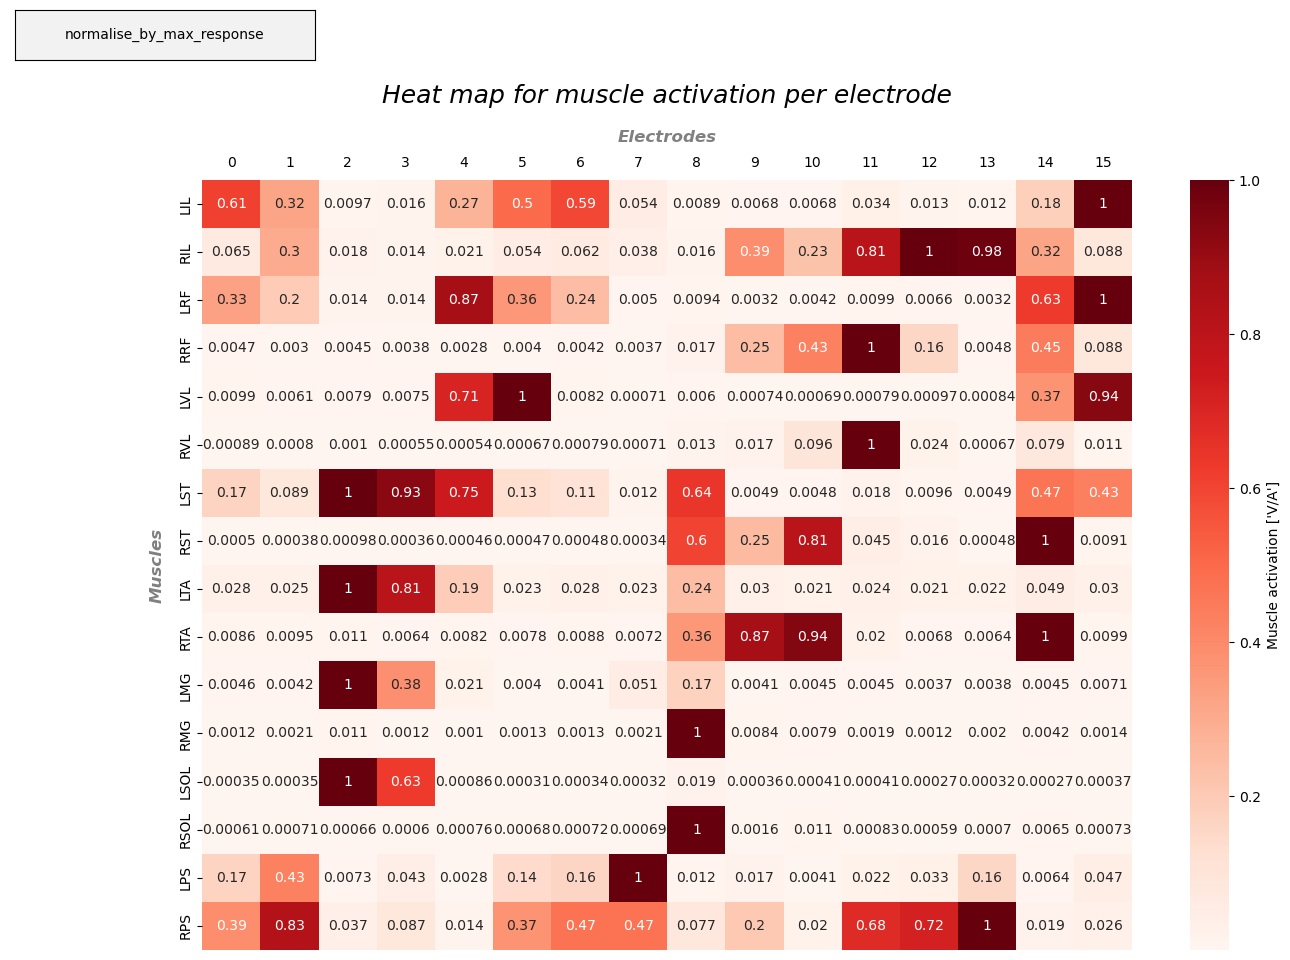

In [101]:
get_heatmap_all_muscles_overview(save_fig=1)

## Heat map indiviudal muscles, paddle lead arrangement

#### Heat map without interpolation

In [105]:
def get_heat_map_individual_msc_no_interpolation(save_fig=0, mt_muscles=mt_muscles, mt_electrodes=mt_electrodes):

    """
    A function to create a heatmap.

    Parameters
    ----------
    save_fig
        int, if set to 1 save figure
    mt_muscles
        df of all the muscles in the gait, set by default
    mt_electrodes
        df of all the electrodes used, set by default

    """

    ## Define which normalisation method is used
    # data=set_normalisation_max_p2p_div_amp(mt_muscles=mt_muscles,mt_electrodes=mt_electrodes)
    # data_structure="normalise_max_P2P_div_amp"
    data=set_normalisation_by_max_response(mt_muscles=mt_muscles,mt_electrodes=mt_electrodes)
    data_structure="normalise_by_max_response"

    # Det the map image as an array so we can plot it 
    map_img = mpimg.imread('/Users/nealarohner/Desktop/Projectome_Finder/code/Refrences/lead_original.png')
    # Define paddle lead
    paddle_lead =np.zeros(80* 9).reshape((80,9))

    # Define annotation
    text = np.array([
    ['', '','', '','', '', '', '', ''], ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','1', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '7','', '','', '', '', '13', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','0', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '6','', '','', '', '', '12', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','15', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''], ['', '5','', '','', '', '', '11', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','14', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '4','', '','', '', '', '10', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''], ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '3','', '2','', '8', '', '9', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
    ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', '']])


    for muscle_i in range(len(mt_muscles)):
        # creating subplot
        fig, ax = plt.subplots(figsize=(3,10)) 
    
        # Add values to the plot 
        numbers=[1, 0, 15, 14]
        for index, number in enumerate(numbers, start=0):   # default is zero
            n=(14*index)+3 # equal spacing
            row=4
            e=number
            #save values to the indeces
            for i in range(6):
                    paddle_lead[i+n][row] =data[muscle_i][e]

        numbers=[7, 6, 5, 4]
        for index, number in enumerate(numbers, start=0):   # default is zero
            n=(14*index)+10 # equal spacing
            row=1
            e=number
            #save values to the indeces
            for i in range(6):
                    paddle_lead[i+n][row] =data[muscle_i][e]

        numbers=[13, 12, 11, 10]
        for index, number in enumerate(numbers, start=0):   # default is zero
            n=(14*index)+10 # equal spacing
            row=7
            e=number
            #save values to the indeces
            for i in range(6):
                    paddle_lead[i+n][row] =data[muscle_i][e]

        numbers=[3, 2, 8, 9]
        for index, number in enumerate(numbers, start=0):   # default is zero
            n=55+10
            row=1+(index*2)
            e=number
            #save values to the indeces
            for i in range(6):
                    paddle_lead[i+n][row] =data[muscle_i][e]        

        # Set title
        ax.set_title(f"Heat map for muscle {mt_muscles['muscle_name'][muscle_i]}", size=18, fontstyle='italic', pad=20)


        # drawing heatmap on current axes
        hmax= sns.heatmap(data=paddle_lead, annot=text, fmt="", cmap='Reds', cbar_kws={'label': "Muscle activation [V/A]"},
            yticklabels=False, xticklabels=False, vmin=0, vmax=1, 
            alpha = 0.75, # whole heatmap is translucent
            zorder = 2,
                )

        # Adjust image
        hmax.imshow(map_img,
            aspect = hmax.get_aspect(),
            extent =hmax.get_xlim() + hmax.get_ylim(),
            zorder = 1) #put the image under the heatmap


        ## Define Textbox
        axbox = fig.add_axes([-0.3, 1.0, 1., 0.05]) #[left, bottom, width, height]
        text_box = TextBox(axbox,label=None, textalignment="center")
        text_box.set_val(data_structure)  # Trigger `submit` with the initial string.

        # Save plots 
        if save_fig:
            folder_name= f"heatmap/muscles/no_interpolation/{data_structure}"
            data_file = mt_muscles['muscle_name'][muscle_i]+"_Heat_map_"+ data_structure+'.png'
            save_figure(folder_name, data_file)

        show()            
   

In [ ]:
get_heat_map_individual_msc_no_interpolation(save_fig=1)


#### Heat map with interpolation 


Which interpolatio approach should be used??
https://support.esri.com/en/technical-article/000005606
Since we have a continuous data: 
     where the location of the electrode  is the  hotspot (=point of highest stimulation), and the area around is stimulated aswell but at a certain decay of the hotspot

- linear interpolation is suited for continuos data and takes into account the 4 neighbouring cells
- cubic interpolation lead to smoother curves of the data (resp. colour changes) since it takes into account the 16 surrounding cells of a an output.

In [72]:
### Interpolate unknown values in the heat map ###

def interpolate_missing_pixels(image, mask, method, fill_value=0):

    """
    A function to interpolate missing values.
    
    Parameters
    ----------
    image 
        2D np.array
    mask
        a 2D boolean array, True indicates missing values
    method
        interpolation method, one of 'nearest', 'linear', 'cubic'.
    fill_value
        which value to use for filling up data outside the
        convex hull of known pixel values.
        Default is 0, Has no effect for 'nearest'.
        
    Return
    ----------
    interp_image
        nd.array with missing values interpolated
    """

    h, w = image.shape[:2]
    xx, yy = np.meshgrid(np.arange(w), np.arange(h))

    known_x = xx[~mask]
    known_y = yy[~mask]
    known_v = image[~mask]
    missing_x = xx[mask]
    missing_y = yy[mask]

    interp_values = interpolate.griddata(
        (known_x, known_y), known_v, (missing_x, missing_y),
        method=method, fill_value=fill_value
    )

    interp_image = image.copy()
    interp_image[missing_y, missing_x] = interp_values

    return interp_image


In [73]:
### text to define electrodes in plot
text = np.array([
['', '','', '','', '', '', '', ''], ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','1', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '7','', '','', '', '', '13', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','0', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '6','', '','', '', '', '12', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','15', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''], ['', '5','', '','', '', '', '11', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','14', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '4','', '','', '', '', '10', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''], ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '3','', '2','', '8', '', '9', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', '']])

In [114]:
## Plot heat map with interpolated data ##
def get_heat_map_individual_msc_with_interpolation(save_fig=0, interpol_method='cubic', text=text, mt_muscles=mt_muscles, mt_electrodes=mt_electrodes):
    """
    A function to create a heatmap.

    Parameters
    ----------
    save_fig
        int, if set to 1 save figure
    interpol_method
        interpolation method, one of 'nearest', 'linear', 'cubic'
    text
        array used for annotation; to define electrodes in the plot
    mt_muscles
        df of all the muscles in the gait, set by default
    mt_electrodes
        df of all the electrodes used, set by default

    """

    ## Define which normalisation method is used
    # data=set_normalisation_max_p2p_div_amp(mt_muscles=mt_muscles,mt_electrodes=mt_electrodes)
    # data_structure="normalise_max_P2P_div_amp"
    
    data=set_normalisation_by_max_response(mt_muscles=mt_muscles,mt_electrodes=mt_electrodes)
    data_structure="normalise_by_max_response"

    # Since it would round values between 0 and 1 to 0, we multiply data by 100
    data=[data_points*100 for data_points in data]

    ## Build tensor filled with -1, thus undefined values are easily recognisable ##
    paddle_lead =np.zeros(80* 9)
    paddle_lead=np.array([-1]*len(paddle_lead))
    paddle_lead=paddle_lead.reshape((80,9))

    ## Get the lead image as an array so we can plot it ##
    map_img = mpimg.imread('/Users/nealarohner/Desktop/Projectome_Finder/code/Refrences/lead_original.png') 

    ## For every muscle fill tensor with values ##
    for muscle_i in range(len(mt_muscles)):
        
        # Set settings for plot ## 
        fig, ax = plt.subplots(figsize=(3,10))# creating subplot
        ax.set_title(f"{interpol_method} interpolated heat map for muscle {mt_muscles['muscle_name'][muscle_i]}", size=18, fontstyle='italic', pad=20)# set title

        # Define electrode placements
        numbers=[1, 0, 15, 14]
        for index, number in enumerate(numbers, start=0): 
            n=(14*index)+3 # equal spacing
            row=4
            e=number
            #save the same value for all the pixels in the electrode
            for i in range(6):
                    paddle_lead[i+n][row] =data[muscle_i][e]
                    # print(i+n)

        numbers=[7, 6, 5, 4]
        for index, number in enumerate(numbers, start=0):  
            n=(14*index)+10 # equal spacing
            row=1
            e=number
            #save values to the indeces
            for i in range(6):
            
                    paddle_lead[i+n][row] =data[muscle_i][e]

        numbers=[13, 12, 11, 10]
        for index, number in enumerate(numbers, start=0):   
            n=(14*index)+10 # equal spacing
            row=7
            e=number
            #save values to the indeces
            for i in range(6):
                    paddle_lead[i+n][row] =data[muscle_i][e]

        numbers=[3, 2, 8, 9]
        for index, number in enumerate(numbers, start=0):  
            n=55+10
            row=1+(index*2)
            e=number
            #save values to the indeces
            for i in range(6):
                    paddle_lead[i+n][row] =data[muscle_i][e] 
        
        # Create boolean, with true for the unknown values, which were set to -1, for interpolation #
        mask=paddle_lead<0

        ## Get interpolation for the unknown values ##
        interpolated_image=interpolate_missing_pixels(
        image=paddle_lead,
        mask=mask,
        method=interpol_method,
        fill_value= 0
        )

        ## Set values outside of lead to zero ##
        # do it after interpolation that this doent get taken into account for interpol
        nr_columns=[8, 4, 2, 1, 1, 1, 2, 4, 8]
        for index, columns in enumerate(nr_columns):
            for col in range(0, columns):
                    interpolated_image[col][0+index] =0

        nr_columns=[7, 5,4, 4, 4, 4,4, 5, 7]
        for index, columns in enumerate(nr_columns):
            for col in range(79, 79-columns, -1):
                    interpolated_image[col][0+index] =0


        ## Drawing heatmap on current axes ##
        # norm = mcolors.TwoSlopeNorm(vmin=interpolated_image.min(),vcenter=0, vmax = interpolated_image.max())
        hmax= sns.heatmap(data=interpolated_image, annot=text, fmt="",
            cmap=LinearSegmentedColormap.from_list('', ['white', 'r']),
            # cmap=plt.cm.RdBu, 
            # norm=norm,
            cbar_kws={'label': "Muscle activation [V/A]"},
            yticklabels=False, xticklabels=False, vmin=0, vmax=100, 
            alpha = 0.75, # whole heatmap is translucent
            zorder = 2,
                )
        hmax.imshow(map_img,
            aspect = hmax.get_aspect(),
            extent =hmax.get_xlim() + hmax.get_ylim(),
            zorder = 1) #put the image under the heatmap


        ## Define Textbox
        axbox = fig.add_axes([-0.5, 1.0, 1., 0.05]) #[left, bottom, width, height]
        text_box = TextBox(axbox,label=None, textalignment="center")
        text_box.set_val(data_structure)  # Trigger `submit` with the initial string.

        ## Save plots 
        if save_fig:
            folder_name= f"heatmap/muscles/interpolation/{data_structure}"
            data_file = mt_muscles['muscle_name'][muscle_i]+"_"+"heat_map"+'.png'
            save_figure(folder_name, data_file)
        show() 

normalisation method is: normalise_max_response


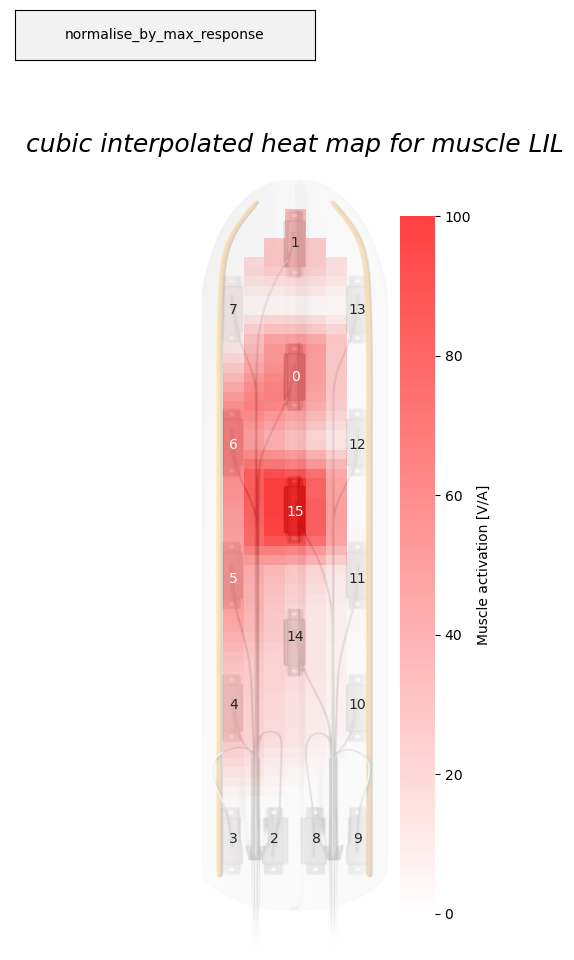

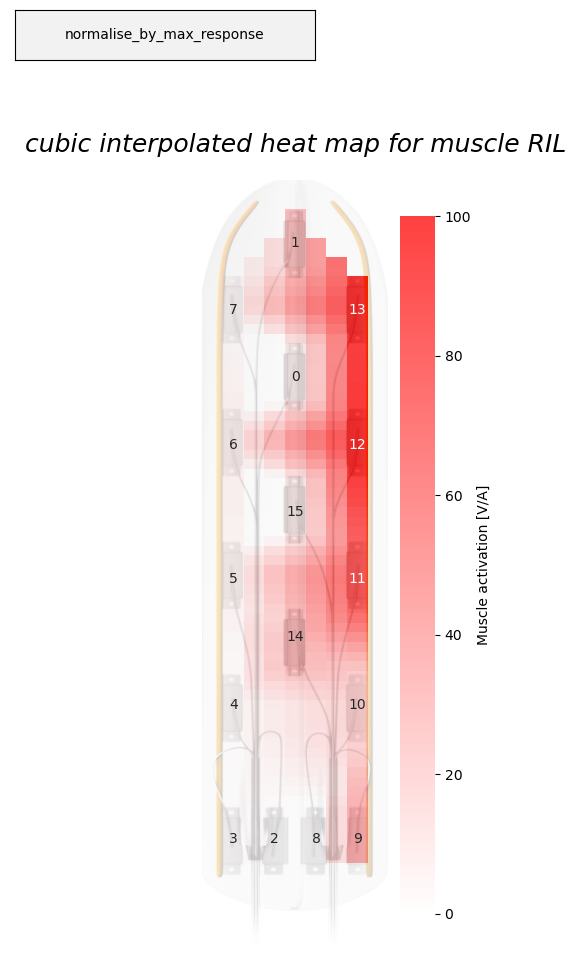

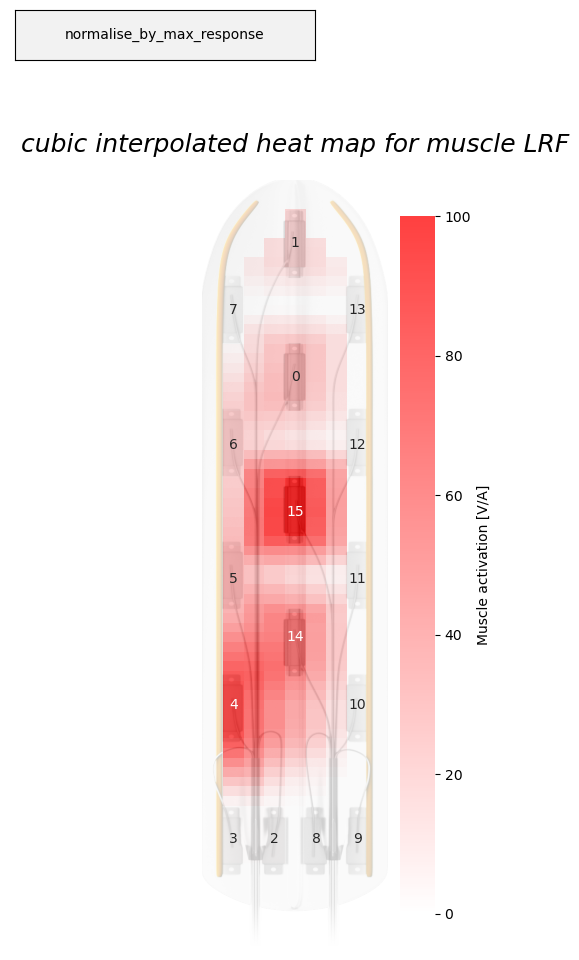

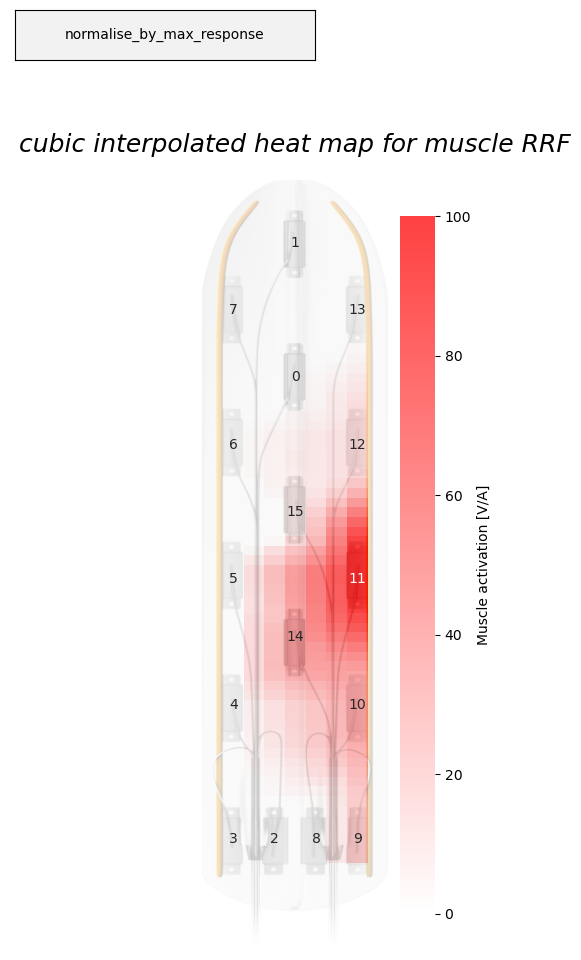

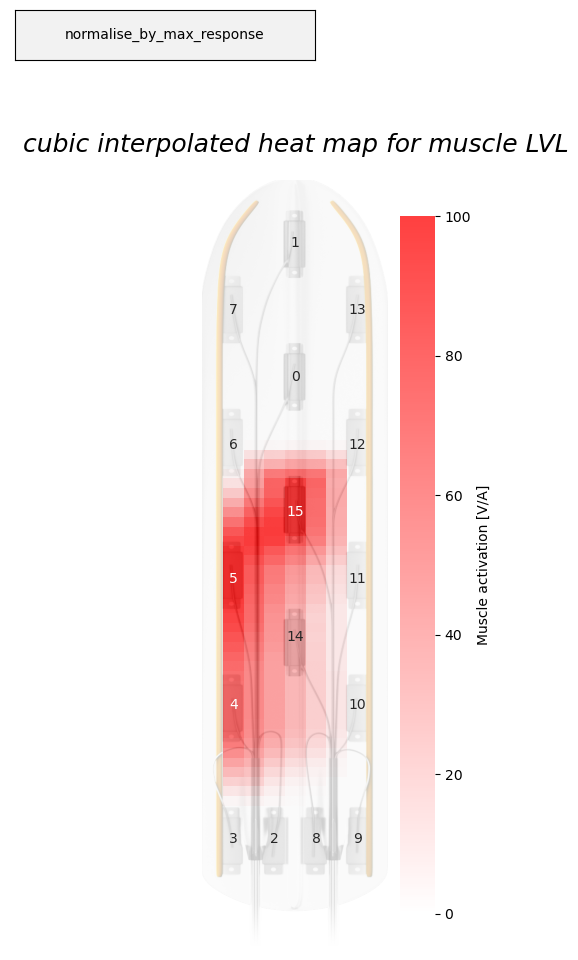

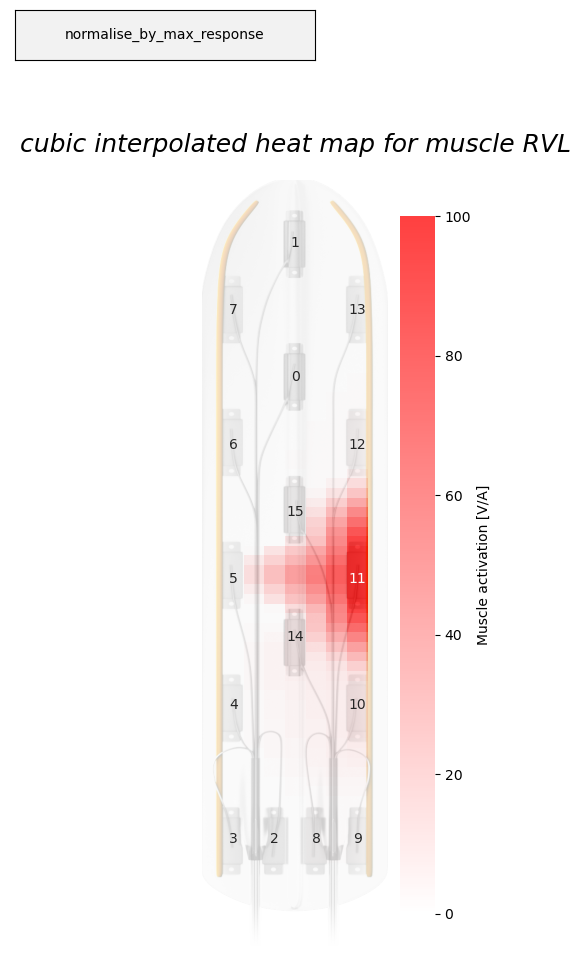

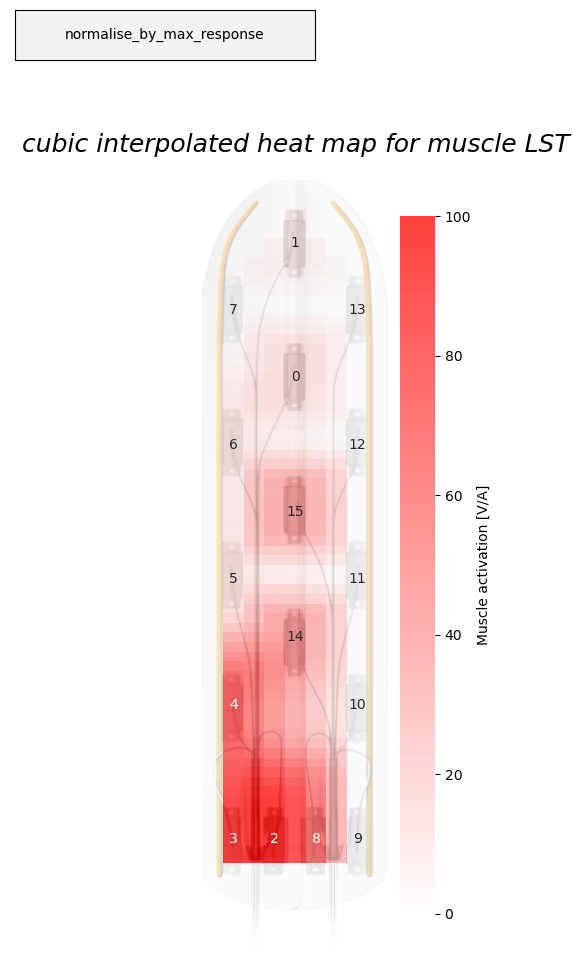

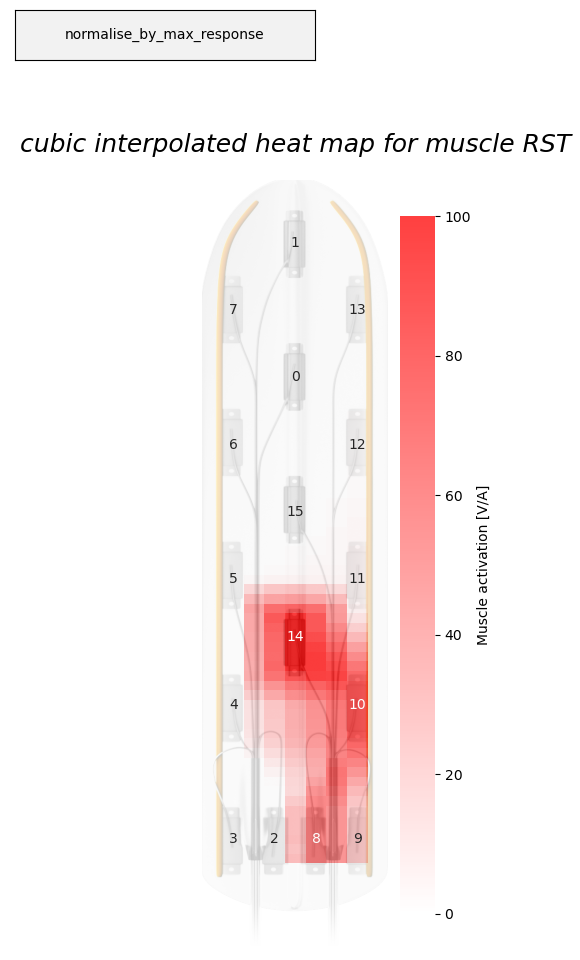

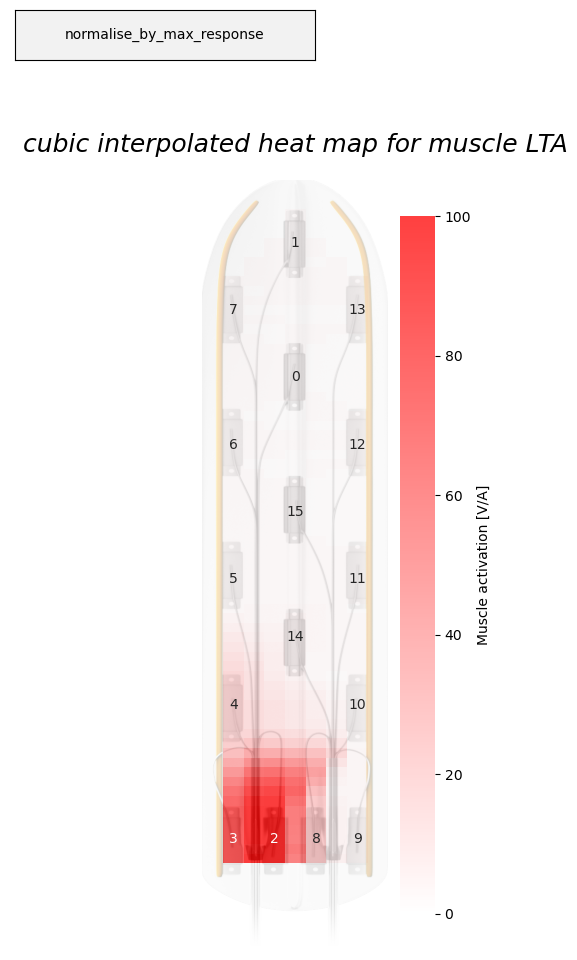

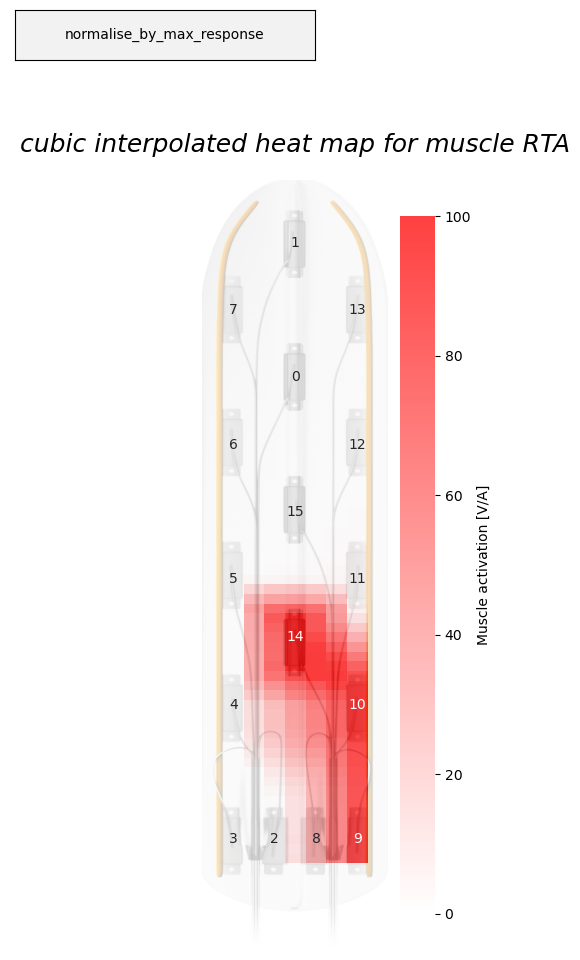

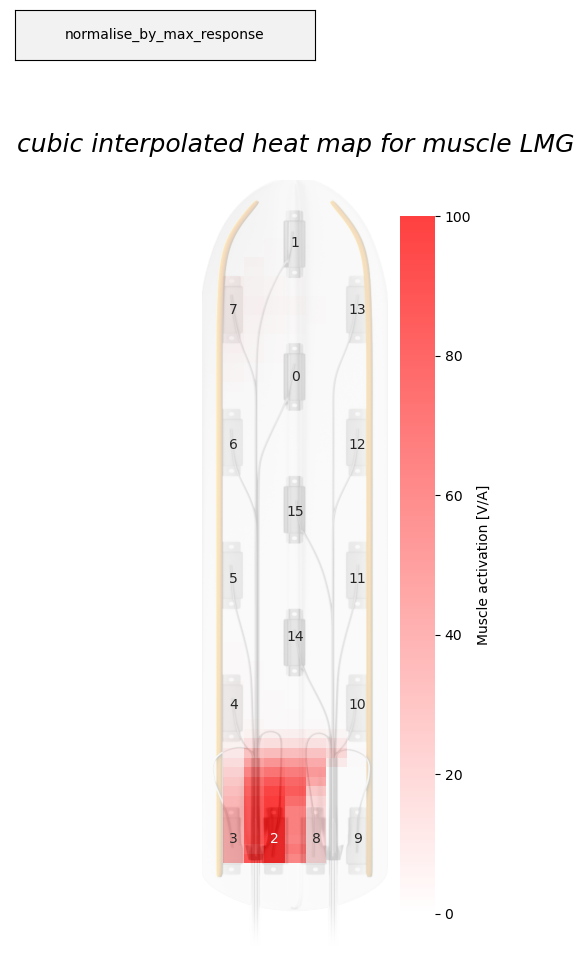

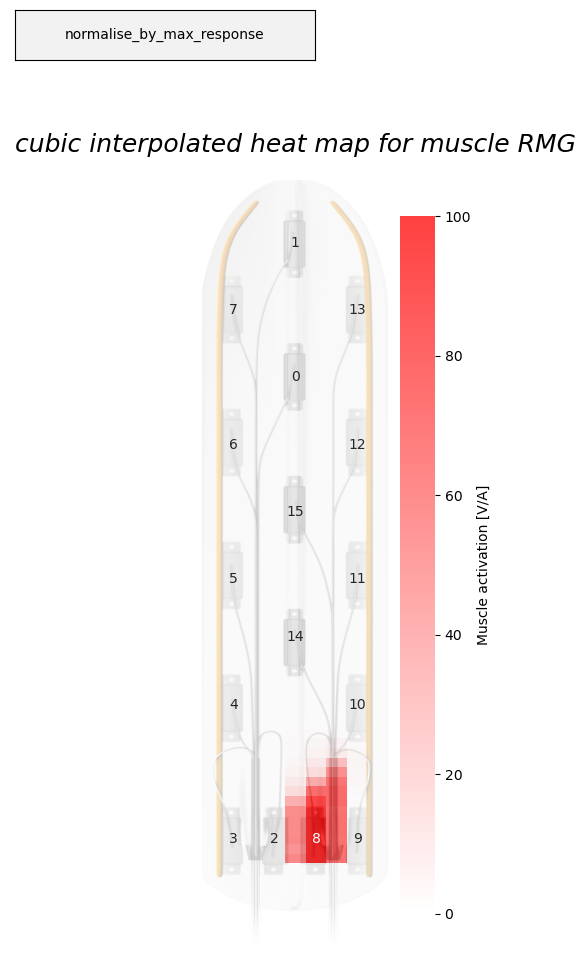

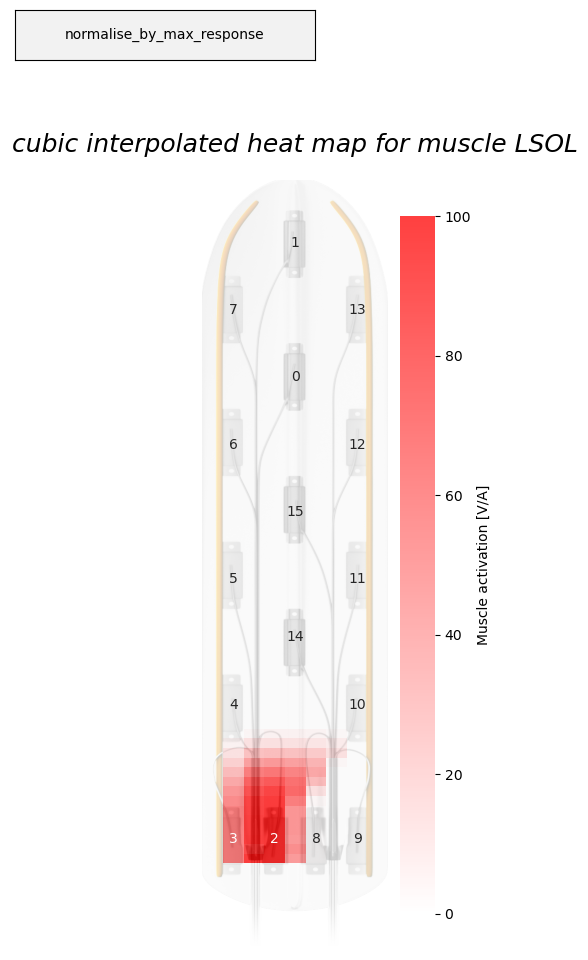

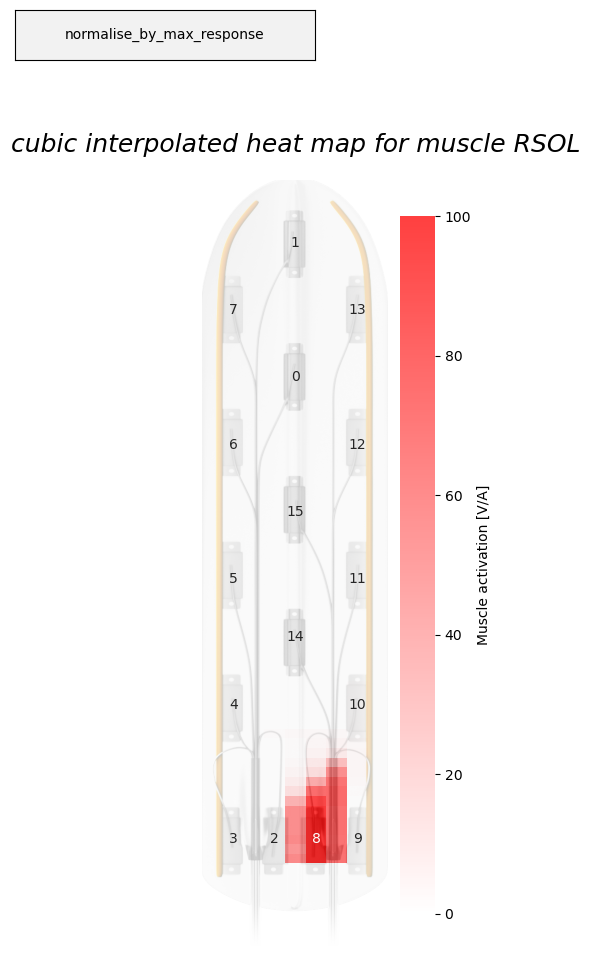

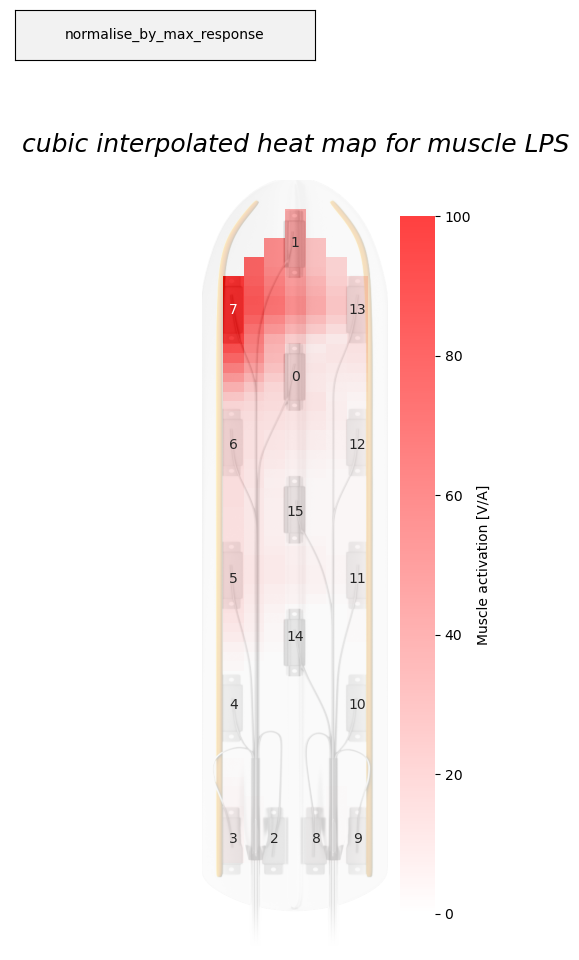

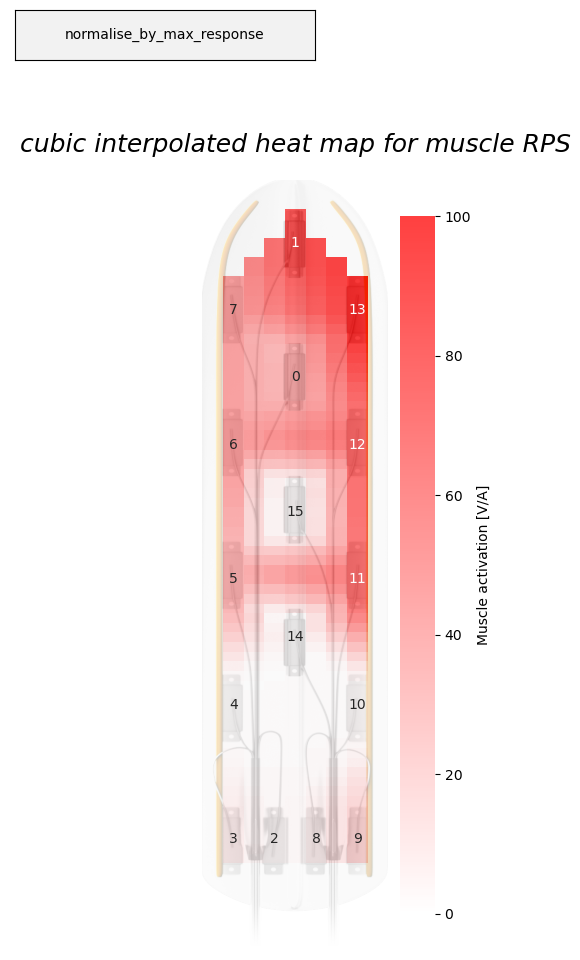

In [116]:
get_heat_map_individual_msc_with_interpolation(save_fig=1)

# B: Fit recruitment to sigmoids

A possible plan could then be to take a look at the parameters of sigmoid after the fit (and the goodness of the fit) and use go from those to describe the data.
Then comparing these to the ones obtained with the simulations.

Version, assuming max value is max data value

In [ ]:
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import numpy as np

# data
F1 = np.array([
    735.0, 696.0, 690.0, 683.0, 680.0, 678.0, 679.0, 675.0, 671.0, 669.0, 668.0,
    664.0, 664.0])
t1 = np.array([
    1, 90000.0, 178200.0, 421200.0, 505800.0, 592200.0, 768600.0, 1036800.0,
    1371600.0, 1630800.0, 1715400.0, 2345400.0, 2409012.0])

plt.plot(t1, F1, 'ro', label="original data")

# curvefit

def func(t, a, b):
    return a + b * np.log(t)

popt, pcov = optimize.curve_fit(func, t1, F1, maxfev=1000)
t = np.linspace(1, 3600 * 24 * 28, 13)
plt.plot(t, func(t, *popt), label="Fitted Curve")
plt.legend(loc='upper left')
plt.show()

opt:[1.05251951e-02 1.48032236e+00 5.18767804e+00 1.33042382e-04]
pcov:[[ 2.11561253e-08 -1.34736611e-06 -2.61238193e-05 -1.59014728e-08]
 [-1.34736611e-06  1.02406207e-03  5.00476972e-04  2.12166817e-06]
 [-2.61238193e-05  5.00476972e-04  1.00275268e-01  1.86387921e-05]
 [-1.59014728e-08  2.12166817e-06  1.86387921e-05  1.58410755e-08]]
opt:[1.05251951e-02 1.48032236e+00 5.18767804e+00 1.33042382e-04]
pcov:[[ 2.11561253e-08 -1.34736611e-06 -2.61238193e-05 -1.59014728e-08]
 [-1.34736611e-06  1.02406207e-03  5.00476972e-04  2.12166817e-06]
 [-2.61238193e-05  5.00476972e-04  1.00275268e-01  1.86387921e-05]
 [-1.59014728e-08  2.12166817e-06  1.86387921e-05  1.58410755e-08]]
opt:[1.05251951e-02 1.48032236e+00 5.18767804e+00 1.33042382e-04]
pcov:[[ 2.11561253e-08 -1.34736611e-06 -2.61238193e-05 -1.59014728e-08]
 [-1.34736611e-06  1.02406207e-03  5.00476972e-04  2.12166817e-06]
 [-2.61238193e-05  5.00476972e-04  1.00275268e-01  1.86387921e-05]
 [-1.59014728e-08  2.12166817e-06  1.86387921e-0

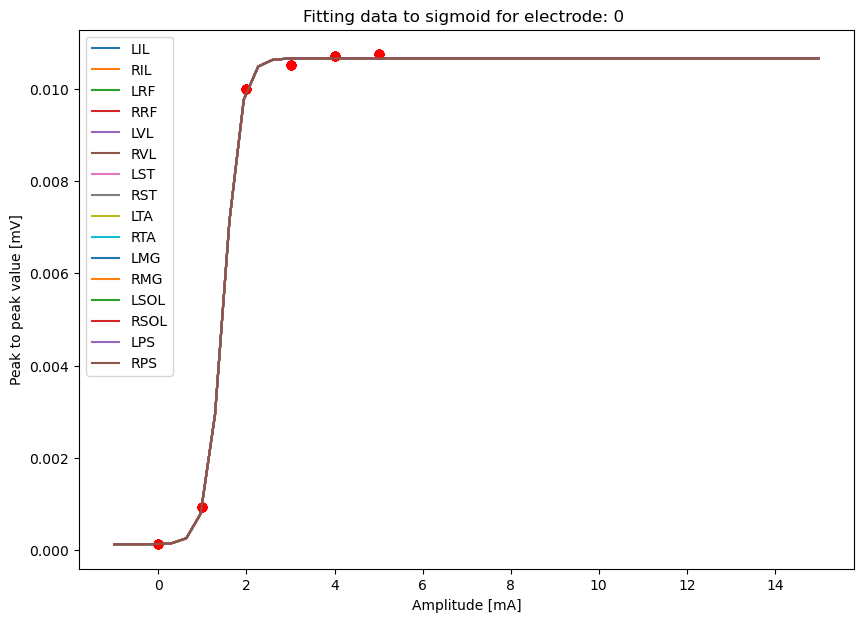

In [244]:
## SErgio version all muscles interpolate for amp values
from matplotlib import pylab
from pylab import *

data_structure= "max_P2P_div_amp"

from scipy.optimize import curve_fit
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

# L is responsible for scaling the output range from [0,1] to [0,L]
# b adds bias to the output and changes its range from [0,L] to [b,L+b]
# k is responsible for scaling the input, which remains in (-inf,inf)
# x0 is the point in the middle of the Sigmoid, i.e. the point where Sigmoid should originally output the value 1/2 [since if x=x0, we get 1/(1+exp(0)) = 1/2].

elec_i=0
# creating subplot

fig, ax = plt.subplots(figsize=(10,7))
for muscle_i in range (0, len(mt_muscles)):
 
    ## assuming
    peak_peak_values=pd.DataFrame(peak2peak_data_to_tensor[elec_i,muscle_i, :,0,0])
    peak_peak_values=peak_peak_values.dropna()
    peak_peak_values=np.array(peak_peak_values[0])
    # unique_amplitudes["amplitudes"]
    # xdata=[]
    # for amp 
    # ydata=peak_peak_values


   


    ## Initial guess for the parameters ##

    # maximum=1 # The maximum asymptotic intensity.
    # midpoint=np.max(xdata) # The time point at which the sigmoidal curve reaches half of its maximum intensity.
    # slope =0.5 # The slope of the curve at the midpoint.
    # # p0 = [maximum, midpoint,slope] # this is an mandatory initial guess
    p0 =[max(ydata), np.median(xdata),1/2,min(ydata)]
    popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox', maxfev=5000)
    print(f"opt:{popt}")
    print(f"pcov:{pcov}")
    x = np.linspace(-1, 15, 50)
    y = sigmoid(x, *popt)
    ax.plot(xdata, ydata, 'o', color= "red")
    ax.plot(x,y,  label=mt_muscles['muscle_name'][muscle_i])






    

    

# set ticks
ax.set_xticks(ticks, labels=labels)
plt.ylabel("Peak to peak value [mV]")
ax.set_xlabel("Amplitude [mA]")
plt.legend()
plt.title(f"Fitting data to sigmoid for electrode: {elec_i} ")
plt.show()


In [ ]:
def fit_sigmoid_max_value(electrode, root, electrodes_from_listing, roots):
    """"
    elec_i
        string or int, sigmoid curves for which electrode
    roots
    """"

    # creating subplot
    fig, ax = plt.subplots(figsize=(10,7))
    for root in range roots:
 
        ## assuming  
        ydata=recruitment_simulation[f"_{electrodes_from_listing[electrode]}_{root}"]["Recruitment"]
        xdata=np.arange(0, len(ydata))
        
        # for the plot amplitudes
        amplitudes=unique_amplitudes



        ## Initial guess for the parameters ##

        # maximum=1 # The maximum asymptotic intensity.
        # midpoint=np.max(xdata) # The time point at which the sigmoidal curve reaches half of its maximum intensity.
        # slope =0.5 # The slope of the curve at the midpoint.
        # # p0 = [maximum, midpoint,slope] # this is an mandatory initial guess
        p0 =[max(ydata), np.median(xdata),1/2,min(ydata)]



        popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox', maxfev=5000)
        print(f"opt:{popt}")
        print(f"pcov:{pcov}")
        x = np.linspace(-1, 15, 50)
        y = sigmoid(x, *popt)
        ax.plot(xdata, ydata, 'o', color= "red")
        ax.plot(x,y,  label=root)

        plt.ylabel("Afferent recruitment [%]")
        


        # set ticks
        # ax.set_xticks(ticks=[])
        plt.xlabel("Electric current [a.u]")
        plt.legend()
        plt.title(f"Fitting data to sigmoid for electrode: {elec_i} ")
        # fig, ax = plt.subplots(figsize=(10,7))

        # ax.set_xticks(ticks=np.linspace(start=0.2, stop=np.max(unique_amplitudes["amplitudes"])+0.1, endpoint=True, num=25))
    plt.show()

    

In [ ]:

def sigmoid(x, L ,x0, k, b):
    """
    A function to create calculate sigmoid curve.

    Parameters
    ----------
    L 
        is responsible for scaling the output range from [0,1] to [0,L]
    b 
        adds bias to the output and changes its range from [0,L] to [b,L+b]
    k 
        is responsible for scaling the input, which remains in (-inf,inf)
    x0 
        is the point in the middle of the Sigmoid, i.e. the point where Sigmoid should originally output the value 1/2 [since if x=x0, we get 1/(1+exp(0)) = 1/2].
     """
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

In [ ]:
## Sergio version all muscles 
from matplotlib import pylab
from pylab import *
from scipy.optimize import curve_fit

# blabla

opt:[0.49645578 3.49352352 2.57204644 0.01336415]
pcov:[[ 7.39143565e-04  1.04417662e-03 -7.19778876e-03 -1.65346078e-04]
 [ 1.04417662e-03  7.61742269e-03 -1.00878552e-02  2.65195873e-04]
 [-7.19778876e-03 -1.00878552e-02  1.55450587e-01  1.64932475e-03]
 [-1.65346078e-04  2.65195873e-04  1.64932475e-03  1.34459272e-04]]
opt:[1.05236213e-01 4.87126238e+00 8.20117983e-01 4.74419491e-03]
pcov:[[ 1.75922964e-03  3.73350310e-02 -8.52495620e-03 -7.56750712e-05]
 [ 3.73350310e-02  7.97584163e-01 -1.80011725e-01 -1.53504487e-03]
 [-8.52495620e-03 -1.80011725e-01  4.40190313e-02  4.19083998e-04]
 [-7.56750712e-05 -1.53504487e-03  4.19083998e-04  5.12797251e-06]]
opt:[0.21496014 3.86538039 2.88257318 0.00447122]
pcov:[[ 9.27403743e-05  1.78686278e-04 -3.14261673e-03 -1.86305059e-05]
 [ 1.78686278e-04  2.47477129e-03 -1.51419113e-03  4.10631633e-05]
 [-3.14261673e-03 -1.51419113e-03  2.26489571e-01  7.86917906e-04]
 [-1.86305059e-05  4.10631633e-05  7.86917906e-04  1.19934815e-05]]
opt:[ 3.3210

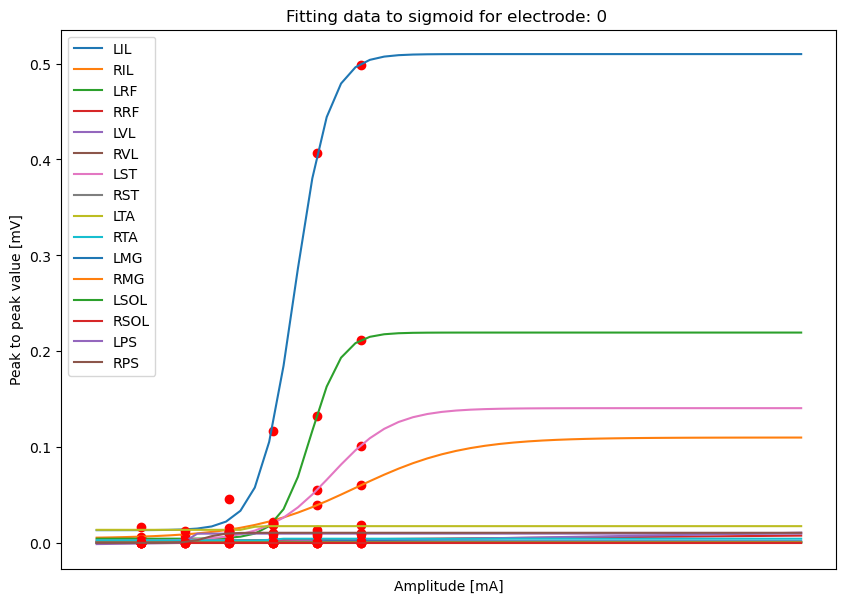

In [246]:
## SErgio version all muscles
from matplotlib import pylab
from pylab import *

data_structure= "max_P2P_div_amp"

from scipy.optimize import curve_fit
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

# L is responsible for scaling the output range from [0,1] to [0,L]
# b adds bias to the output and changes its range from [0,L] to [b,L+b]
# k is responsible for scaling the input, which remains in (-inf,inf)
# x0 is the point in the middle of the Sigmoid, i.e. the point where Sigmoid should originally output the value 1/2 [since if x=x0, we get 1/(1+exp(0)) = 1/2].

elec_i=0
# creating subplot

fig, ax = plt.subplots(figsize=(10,7))
for muscle_i in range (0, len(mt_muscles)):
 
   

    ## assuming
    peak_peak_values=pd.DataFrame(peak2peak_data_to_tensor[elec_i,muscle_i, :,0,0])
    peak_peak_values=peak_peak_values.dropna()
    peak_peak_values=np.array(peak_peak_values[0])
    xdata=np.arange(0, len(peak_peak_values))
    ydata=peak_peak_values


    # for the plot amplitudes
    amplitudes=unique_amplitudes
    # amplitudes=pd.DataFrame(amplitude_filtereddata_to_tensor[elec_i,muscle_i, :,0,0])
    # amplitudes=amplitudes.dropna()
    # amplitudes=np.array(amplitudes[0])


    ## Initial guess for the parameters ##

    # maximum=1 # The maximum asymptotic intensity.
    # midpoint=np.max(xdata) # The time point at which the sigmoidal curve reaches half of its maximum intensity.
    # slope =0.5 # The slope of the curve at the midpoint.
    # # p0 = [maximum, midpoint,slope] # this is an mandatory initial guess
    p0 =[max(ydata), np.median(xdata),1/2,min(ydata)]



    popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox', maxfev=5000)
    print(f"opt:{popt}")
    print(f"pcov:{pcov}")
    x = np.linspace(-1, 15, 50)
    y = sigmoid(x, *popt)
    ax.plot(xdata, ydata, 'o', color= "red")
    ax.plot(x,y,  label=mt_muscles['muscle_name'][muscle_i])

    plt.ylabel("Peak to peak value [mV]")


    # set ticks
    ax.set_xticks(ticks=[])
    ax.set_xlabel("Amplitude [mA]")
    plt.legend()
    plt.title(f"Fitting data to sigmoid for electrode: {elec_i} ")
    # fig, ax = plt.subplots(figsize=(10,7))

    # ax.set_xticks(ticks=np.linspace(start=0.2, stop=np.max(unique_amplitudes["amplitudes"])+0.1, endpoint=True, num=25))



    # set ticks

    # ticks=np.arange(0, len(amplitudes))
    # labels=amplitudes
    # ax.set_xticks(ticks, labels=labels)




plt.show()


opt:[0.49645561 3.49352357 2.57205074 0.01336421]
pcov:[[ 7.39141632e-04  1.04417296e-03 -7.19778168e-03 -1.65345728e-04]
 [ 1.04417296e-03  7.61741131e-03 -1.00878387e-02  2.65195941e-04]
 [-7.19778168e-03 -1.00878387e-02  1.55450996e-01  1.64932353e-03]
 [-1.65345728e-04  2.65195941e-04  1.64932353e-03  1.34459141e-04]]


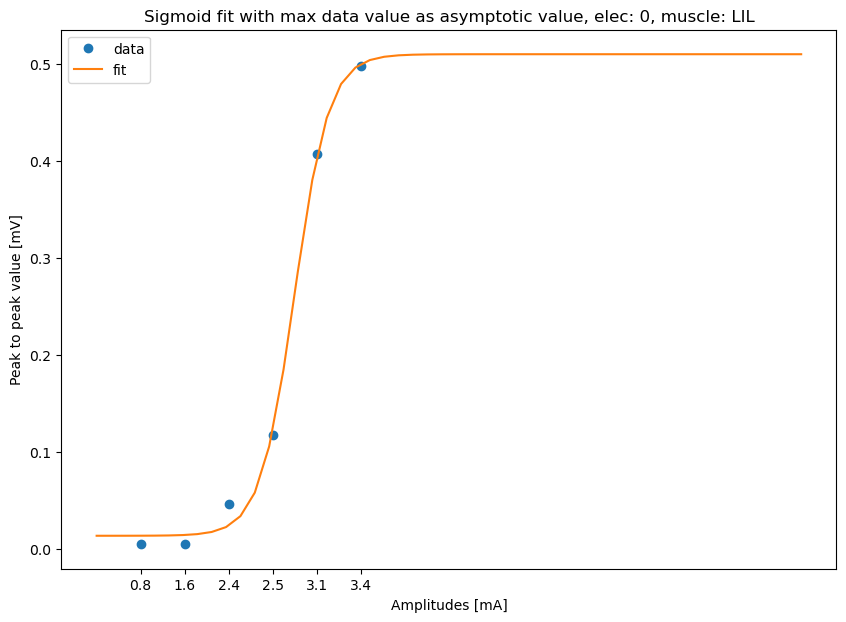

In [131]:
## SErgio version one muslce
from matplotlib import pylab
from pylab import *

data_structure= "max_P2P_div_amp"

from scipy.optimize import curve_fit
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

# L is responsible for scaling the output range from [0,1] to [0,L]
# b adds bias to the output and changes its range from [0,L] to [b,L+b]
# k is responsible for scaling the input, which remains in (-inf,inf)
# x0 is the point in the middle of the Sigmoid, i.e. the point where Sigmoid should originally output the value 1/2 [since if x=x0, we get 1/(1+exp(0)) = 1/2].

muscle_i=0
elec_i=0
## assuming
peak_peak_values=pd.DataFrame(peak2peak_data_to_tensor[muscle_i,elec_i,:,0,0])
peak_peak_values=peak_peak_values.dropna()
peak_peak_values=np.array(peak_peak_values[0])
xdata=np.arange(0, len(peak_peak_values))
ydata=peak_peak_values


# for the plot amplitudes
amplitudes=pd.DataFrame(amplitude_filtereddata_to_tensor[muscle_i,elec_i,:])
amplitudes=amplitudes.dropna()
amplitudes=np.array(amplitudes[0])


## Initial guess for the parameters ##

# maximum=1 # The maximum asymptotic intensity.
# midpoint=np.max(xdata) # The time point at which the sigmoidal curve reaches half of its maximum intensity.
# slope =0.5 # The slope of the curve at the midpoint.
# # p0 = [maximum, midpoint,slope] # this is an mandatory initial guess
p0 =[max(ydata), np.median(xdata),1,min(ydata)]
# p0 =[1, np.median(xdata),1,min(ydata)]

popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox')
print(f"opt:{popt}")
print(f"pcov:{pcov}")
x = np.linspace(-1, 15, 50)
y = sigmoid(x, *popt)

fig, ax = plt.subplots(figsize=(10,7))
plt.ylabel("Peak to peak value [mV]")
plt.xlabel("Amplitudes [mA]")
plt.title(f"Sigmoid fit with max data value as asymptotic value, elec: {elec_i}, muscle: {mt_muscles['muscle_name'][muscle_i]}")
pylab.plot(xdata, ydata, 'o', label='data')

# set ticks

ticks=np.arange(0, len(amplitudes))
labels=amplitudes
ax.set_xticks(ticks, labels=labels)

pylab.plot(x,y, label='fit')
plt.legend()

# ## Define Textbox
# axbox = fig.add_axes([0, 1.0, 1.0, 0.05]) #[left, bottom, width, height]
# text_box = TextBox(axbox,label=None, textalignment="center")
# text_box.set_val(f"Normalisation method: {data_structure}")  # Trigger `submit` with the initial string.
plt.show()


Version assuming max value is at higher amplitude

In [ ]:
# Neala version  original


import numpy as np
import pylab
from scipy.optimize import curve_fit


data_structure= "max_P2P_div_amp"

def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y
# k>0

# Take slice of tensor and get rid of nan values
peak_peak_values=pd.DataFrame(peak2peak_data_to_tensor[muscle_i,elec_i,:,0,0]) #Convert tensor slice to df
peak_peak_values=peak_peak_values.dropna() #Get rid of nan values
peak_peak_values=np.array(peak_peak_values[0]) #Convert to np array
# Set values to plot for original data
xdata=np.arange(0, len(peak_peak_values)) 
ydata=peak_peak_values

# Set the given amplitudes as a x-label
amplitudes=pd.DataFrame(amplitude_filtereddata_to_tensor[muscle_i,elec_i,:])
amplitudes=amplitudes.dropna()
amplitudes=np.array(amplitudes[0])

# Find Optimal values for the parameters( popt) so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized.
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print (popt)

# Set values to plot for interpolated data
x = np.linspace(-1, 15, 50) # How did I set this parameter ? 
y = sigmoid(x, *popt)

fig, ax = plt.subplots(figsize=(10,7))
plt.ylabel("Peak to peak value [mV]")
plt.xlabel("Amplitudes [mA]")
plt.title(f"Sigmoid fit asymptotic value after max data value,  elec: {elec_i}, muscle: {mt_muscles['muscle_name'][muscle_i]}")
ticks=np.arange(0, len(amplitudes))
labels=amplitudes
ax.set_xticks(ticks, labels=labels)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')

#Get original peak to peak, without dividing by amplitude, otherwise overfitting?
# ## Define Textbox
# axbox = fig.add_axes([0, 1.0, 1.0, 0.05]) #[left, bottom, width, height]
# text_box = TextBox(axbox,label=None, textalignment="center")
# text_box.set_val(f"Normalisation method: {data_structure}")  # Trigger `submit` with the initial string.

pylab.show()

[4.81608384 0.92039473]


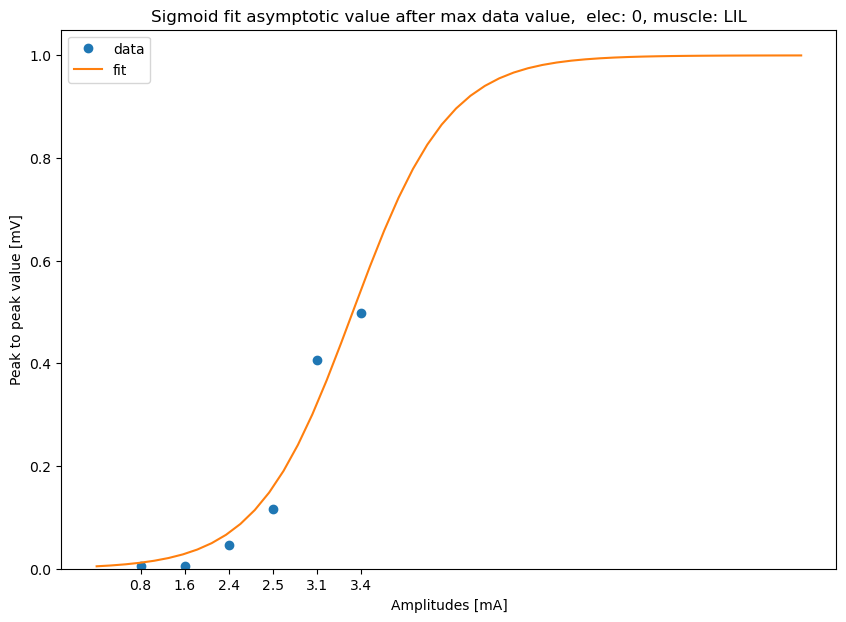

In [128]:
# Neala version 


import numpy as np
import pylab
from scipy.optimize import curve_fit


data_structure= "max_P2P_div_amp"

def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y
# k>0

# Take slice of tensor and get rid of nan values
peak_peak_values=pd.DataFrame(peak2peak_data_to_tensor[muscle_i,elec_i,:,0,0]) #Convert tensor slice to df
peak_peak_values=peak_peak_values.dropna() #Get rid of nan values
peak_peak_values=np.array(peak_peak_values[0]) #Convert to np array
# Set values to plot for original data
xdata=np.arange(0, len(peak_peak_values)) 
ydata=peak_peak_values

# Set the given amplitudes as a x-label
amplitudes=pd.DataFrame(amplitude_filtereddata_to_tensor[muscle_i,elec_i,:])
amplitudes=amplitudes.dropna()
amplitudes=np.array(amplitudes[0])

# Find Optimal values for the parameters( popt) so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized.
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print (popt)

# Set values to plot for interpolated data
x = np.linspace(-1, 15, 50) # How did I set this parameter ? 
y = sigmoid(x, *popt)

fig, ax = plt.subplots(figsize=(10,7))
plt.ylabel("Peak to peak value [mV]")
plt.xlabel("Amplitudes [mA]")
plt.title(f"Sigmoid fit asymptotic value after max data value,  elec: {elec_i}, muscle: {mt_muscles['muscle_name'][muscle_i]}")
ticks=np.arange(0, len(amplitudes))
labels=amplitudes
ax.set_xticks(ticks, labels=labels)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')

#Get original peak to peak, without dividing by amplitude, otherwise overfitting?
# ## Define Textbox
# axbox = fig.add_axes([0, 1.0, 1.0, 0.05]) #[left, bottom, width, height]
# text_box = TextBox(axbox,label=None, textalignment="center")
# text_box.set_val(f"Normalisation method: {data_structure}")  # Trigger `submit` with the initial string.

pylab.show()